In [1]:
import matplotlib as plt
import textwrap

In [2]:
import sys
sys.path.append('..')
from utils import *

In [3]:
# arxiv_number_list=['1106.6060','1812.04213','2004.04168','2008.08998','2012.04554','2108.02159','2110.11330','2111.01152','2112.07523',]
arxiv_number_list = [
    "1010.1819",
    "1106.6060",
    "1208.0116",
    # "1212.5363", # TODO
    "1310.2674",
    "1812.04213",
    "2004.04168",
    "2008.08998",
    "2012.04554",
    "2108.02159",
    "2110.11330",
    "2111.01152",
    "2112.07523",
    "2308.03843",
    "2308.07488",
]
# '2308.03843'

In [4]:
len(set(arxiv_number_list))

14

In [5]:
import pandas as pd

In [6]:
def load_arxiv(arxiv_number):
    # Load arxiv and convert to dict
    prompt_template='../prompt_template.md'
    prompt_dict=load_prompt_template(prompt_template)
    with open(os.path.join('..',f'{arxiv_number}',f'{arxiv_number}.yaml'),'r') as f:
        kwargs= yaml.safe_load(f)
    # tasks = [f'Task:{idx+1} '+kwarg['task'] for idx,kwarg in enumerate(kwargs[1:])]
    tasks = [kwarg['task'] for idx,kwarg in enumerate(kwargs[1:])]
    score_dict={}
    for kwarg in kwargs[1:]:
        for key,value in (list(kwarg['score'].items())):
            assert isinstance(value, int), f'{arxiv_number}/{kwarg["task"]}:{key}:{value} is not int'
            if key not in score_dict:
                score_dict[key]=[value]
            else:
                score_dict[key].append(value)
    
    return pd.DataFrame(score_dict,index=tasks)

In [7]:
arxiv_dict_list={arxiv_number:load_arxiv(arxiv_number) for arxiv_number in arxiv_number_list}
execution=pd.concat(arxiv_dict_list.values(),keys=arxiv_dict_list.keys(),names=['arxiv_number','task'])

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_single_file(score_dict):
    x = np.arange(len(score_dict['task']))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained',figsize=(8,5))
    color_list=[plt.cm.Blues(0.2+0.8*(i/6)) for i in range(6,0,-1)]
    for attribute, measurement in score_dict['score'].items():
        offset = width * multiplier
        rects = ax.barh(x + offset, np.array(measurement)+0.1, width, label=attribute,color=color_list[multiplier],left=-0.1)
        # ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_xlabel('Score')
    ax.set_xticks([0,1,2])
    ax.set_title(f"{score_dict['arxiv']} [mean={np.mean(score_dict['score']['final answer accuracy']):.2f}]")
    ax.set_yticks(x + width*4, ['\n'.join(textwrap.wrap(task, width=40)) for task in score_dict['task']],fontsize=8)

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1],loc='upper left', ncols=1,bbox_to_anchor=(1, 1))

    ax.grid(axis='x',ls='--')
    # ax.set_ylim(0, 250)
    ax.set_xlim(-0.1,2.1)


In [9]:
color_list=[plt.cm.Blues(0.2+0.8*(i/6)) for i in range(6,0,-1)]

In [10]:
def plot_single_file(arxiv_df,arxiv_number):
    # arxiv_df=arxiv_dict_list['1010.1819']
    ax=arxiv_df.plot(kind='barh',figsize=(8,5),width=0.8,color=color_list,edgecolor='black')
    ax.grid(axis='x',ls='--')
    ax.set_ylabel('')
    ax.set_xlabel('Score')
    # ax.set_yticklabels(['\n'.join(textwrap.wrap(task, width=20)) for task in data_groupby_branch['Score']['mean'].sort_values().index],fontsize=7)
    ax.set_yticklabels(['\n'.join(textwrap.wrap(task, width=40)) for task in arxiv_df.index])
    ax.set_title(f"{arxiv_number}")

In [11]:
# for key,arxiv_df in arxiv_dict_list.items():
#     plot_single_file(arxiv_df,key)

# Score by arxiv , compare with reading

In [30]:
angle_name={'follow_instructions':'adherence','physics_logic':'knowledge','math_derivation':'rigor','final_answer_accuracy':'correctness'}

In [12]:
new_col={key:angle_name[key] if key in angle_name else key.replace('_',' ') for key in execution.columns}

In [31]:
new_col

{'in_paper': 'in paper',
 'prompt_quality': 'prompt quality',
 'follow_instructions': 'adherence',
 'physics_logic': 'knowledge',
 'math_derivation': 'rigor',
 'final_answer_accuracy': 'correctness'}

In [14]:
execution=execution.rename(columns=new_col)

In [15]:
execution_groupby_arxiv=execution.groupby('arxiv_number').agg(['mean','sem','count'])

In [17]:
execution_groupby_arxiv[['correctness']]

correctness                
                    mean       sem count
arxiv_number                            
1010.1819       1.333333  0.256235    12
1106.6060       1.555556  0.175682     9
1208.0116       1.727273  0.194978    11
1310.2674       1.818182  0.121967    11
1812.04213      1.333333  0.224733    12
2004.04168      1.727273  0.140836    11
2008.08998      1.909091  0.090909    11
2012.04554      2.000000  0.000000    11
2108.02159      1.916667  0.083333    12
2110.11330      1.636364  0.203279    11
2111.01152      1.750000  0.111803    16
2112.07523      1.300000  0.260342    10
2308.03843      1.909091  0.090909    11
2308.07488      1.750000  0.130558    12

In [32]:
import pickle

In [33]:
with open('reading_data.pickle','rb') as f:
    reading_data=pickle.load(f)

In [34]:
reading_groupby_arxiv=reading_data.groupby('arxiv').agg(['mean','sem','count'])

In [35]:
reading_groupby_arxiv

Score                
                mean       sem count
arxiv                               
1010.1819   1.181034  0.080849   116
1106.6060   0.770833  0.133951    48
1208.0116   1.446429  0.080057   112
1310.2674   1.111111  0.090680    99
1812.04213  1.194915  0.087837   118
2004.04168  0.708333  0.109125    72
2008.08998  1.595745  0.081900    94
2012.04554  1.058140  0.101095    86
2108.02159  1.155738  0.085550   122
2110.11330  1.181818  0.099036    88
2111.01152  1.601190  0.054809   168
2112.07523  1.693878  0.068662    98
2308.03843  1.350000  0.088048   100
2308.07488  1.140845  0.080944   142

In [39]:
execution_reading=pd.concat([execution_groupby_arxiv[['correctness']],reading_groupby_arxiv],axis=1,).rename(columns={'correctness':'Execution','Score':'Extraction'})

In [40]:
execution_reading

Execution                 Extraction                
                mean       sem count       mean       sem count
1010.1819   1.333333  0.256235    12   1.181034  0.080849   116
1106.6060   1.555556  0.175682     9   0.770833  0.133951    48
1208.0116   1.727273  0.194978    11   1.446429  0.080057   112
1310.2674   1.818182  0.121967    11   1.111111  0.090680    99
1812.04213  1.333333  0.224733    12   1.194915  0.087837   118
2004.04168  1.727273  0.140836    11   0.708333  0.109125    72
2008.08998  1.909091  0.090909    11   1.595745  0.081900    94
2012.04554  2.000000  0.000000    11   1.058140  0.101095    86
2108.02159  1.916667  0.083333    12   1.155738  0.085550   122
2110.11330  1.636364  0.203279    11   1.181818  0.099036    88
2111.01152  1.750000  0.111803    16   1.601190  0.054809   168
2112.07523  1.300000  0.260342    10   1.693878  0.068662    98
2308.03843  1.909091  0.090909    11   1.350000  0.088048   100
2308.07488  1.750000  0.130558    12   1.140845  0.080944   142

In [41]:
execution_reading.corr().loc[("Extraction","mean"),("Execution","mean")]

-0.06867832414580882

Text(0.5, 1.0, 'Correlation:-0.0687')

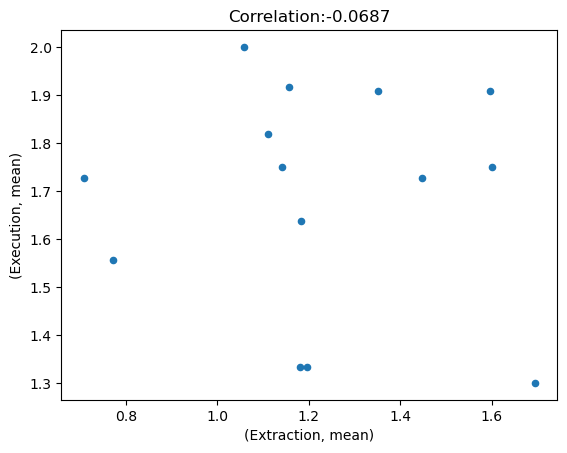

In [42]:
execution_reading.plot(kind='scatter',x=('Extraction','mean'),y=('Execution','mean'))
plt.title(f'Correlation:{execution_reading.corr().loc[("Extraction","mean"),("Execution","mean")]:0.04f}')

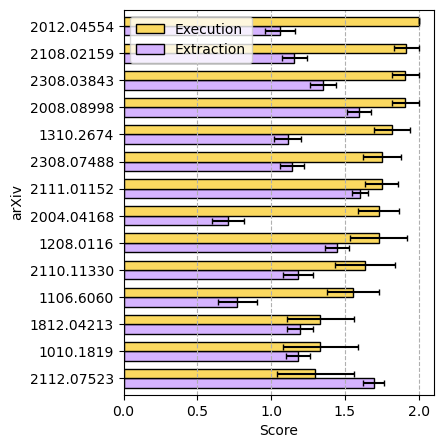

In [45]:
means = execution_reading.sort_values(by=('Execution','mean'))[[ ("Extraction", "mean"),("Execution", "mean")]].droplevel(1,axis=1)
errors = execution_reading.sort_values(by=('Execution','mean'))[[("Extraction", "sem"),("Execution", "sem")]].droplevel(1,axis=1)
ax = means.plot(kind='barh', xerr=errors, capsize=2,figsize=(4,5),color=['#d5b3ff','#fbd960'],edgecolor='k',width=0.7)
ax.grid(axis='x',ls='--')
ax.set_xlabel('Score')
# ax.set_title('\n'.join([f'Mean of {kind}: {mean:.2f} $\pm$ {se:.2f}' for kind,mean,se in zip(['Execution','Extraction',],means.mean()[::-1],errors.mean()[::-1])]))
ax.set_ylabel('arXiv',)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

ax.get_figure().savefig('4b.pdf',bbox_inches='tight')

# Score by aspect

In [18]:
execution.mean().iloc[2:]

adherence      1.78125
knowledge      1.81250
rigor          1.93750
correctness    1.69375
dtype: float64

In [19]:
execution.mean().iloc[2:].index

Index(['adherence', 'knowledge', 'rigor', 'correctness'], dtype='object')

In [20]:
['\n'.join(textwrap.wrap(task.replace(' ',' '), width=20)) for task in execution.mean().iloc[2:].index]

['adherence', 'knowledge', 'rigor', 'correctness']

In [21]:
execution.mean()[2:]

adherence      1.78125
knowledge      1.81250
rigor          1.93750
correctness    1.69375
dtype: float64

In [22]:
execution.sem()[:1:-1]

correctness    0.045208
rigor          0.021145
knowledge      0.035674
adherence      0.041277
dtype: float64

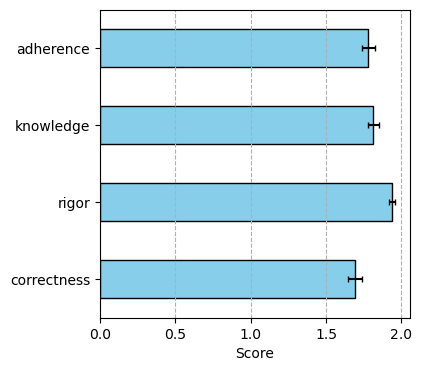

In [46]:
ax=execution.mean().iloc[:1:-1].plot(kind='barh',xerr=execution.sem()[:1:-1],capsize=2,edgecolor='k',figsize=(4,4),color='skyblue')
ax.grid(axis='x',ls='--')
ax.set_xlabel('Score')
ax.set_ylabel('')
# ax.set_yticklabels(['\n'.join(textwrap.wrap(task.replace(' ',' '), width=20)) for task in execution.mean().iloc[:1:-1].index],fontsize=8)
# ax.set_title('Performance of execution from different aspects')

ax.get_figure().savefig('3b.pdf',bbox_inches='tight')

# Score by task

In [70]:
execution[(execution['execution']==2) & (execution.iloc[:,2:-1].mean(axis=1)!=2)]

in paper  \
branch                      arxiv_number task_type                       task                                                           
lattice, second-quantized   2004.04168   Interacting quantum Hamiltonian Construct Kinetic Hamiltonian (lattice version)            2   
                                         Hartree and Fock terms          Swap the index only                                        0   
                            2008.08998   Interacting quantum Hamiltonian Construct Kinetic Hamiltonian (lattice version)            2   
                                         Order parameters                Combine the Hartree and Fock term                          2   
                            2012.04554   Interacting quantum Hamiltonian Construct Kinetic Hamiltonian (lattice version)            2   
                                         Hamiltonian in momentum space   Convert noninteracting Hamiltonian in real spac...         0   
                                         Hartree and Fock terms          Swap the index only                                        0   
                                         Order parameters                Reduce momentum in Hartree term (momentum in BZ)           0   
                            2110.11330   Interacting quantum Hamiltonian Construct Kinetic Hamiltonian (lattice version)            2   
                                         Hamiltonian in momentum space   Convert noninteracting Hamiltonian in real spac...         0   
continuum, first-quantized  2111.01152   Order parameters                Reduce momentum in Hartree term (momentum in BZ...         2   
continuum, second-quantized 2112.07523   Order parameters                Reduce momentum in Hartree term (momentum in BZ...         2   
continuum, first-quantized  2308.07488   Mean field decomposition        Wick's theorem                                             0   

                                                                                                                             prompt quality  \
branch                      arxiv_number task_type                       task                                                                 
lattice, second-quantized   2004.04168   Interacting quantum Hamiltonian Construct Kinetic Hamiltonian (lattice version)                  2   
                                         Hartree and Fock terms          Swap the index only                                              2   
                            2008.08998   Interacting quantum Hamiltonian Construct Kinetic Hamiltonian (lattice version)                  2   
                                         Order parameters                Combine the Hartree and Fock term                                2   
                            2012.04554   Interacting quantum Hamiltonian Construct Kinetic Hamiltonian (lattice version)                  2   
                                         Hamiltonian in momentum space   Convert noninteracting Hamiltonian in real spac...               2   
                                         Hartree and Fock terms          Swap the index only                                              2   
                                         Order parameters                Reduce momentum in Hartree term (momentum in BZ)                 2   
                            2110.11330   Interacting quantum Hamiltonian Construct Kinetic Hamiltonian (lattice version)                  2   
                                         Hamiltonian in momentum space   Convert noninteracting Hamiltonian in real spac...               2   
continuum, first-quantized  2111.01152   Order parameters                Reduce momentum in Hartree term (momentum in BZ...               2   
continuum, second-quantized 2112.07523   Order parameters                Reduce momentum in Hartree term (momentum in BZ...               0   
continuum, first-quantized  2308.07488   Mean field decomposition  

In [71]:
execution_groupby_task=execution.groupby('task').agg(['mean','sem','count'])

In [72]:
with open('../Naming.yaml','r') as f:
    naming=yaml.safe_load(f)

In [161]:
# naming_order=[for key in (naming.keys()) if key in execution_groupby_task]

In [73]:
execution_groupby_task_mean=execution_groupby_task[execution_groupby_task[('in paper','count')]>2].sort_values(by=('execution','mean')).loc[:,(slice(None),'mean')].iloc[:,2:].droplevel(1,axis=1)
execution_groupby_task_sem=execution_groupby_task[execution_groupby_task[('in paper','count')]>2].sort_values(by=('execution','mean')).loc[:,(slice(None),'sem')].iloc[:,2:].droplevel(1,axis=1)

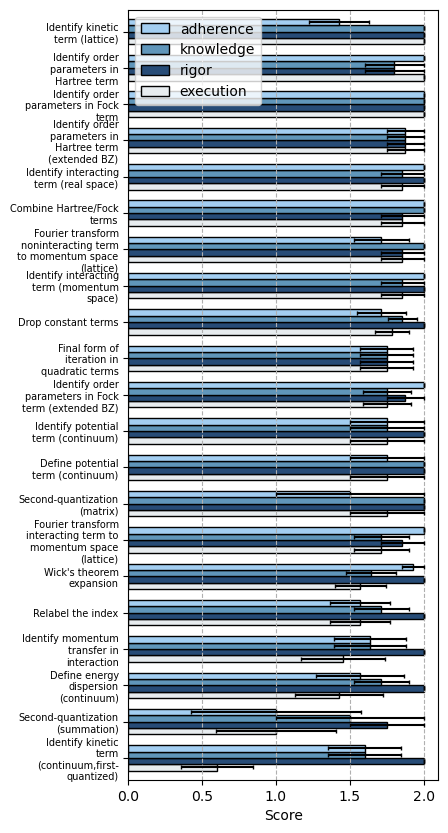

In [79]:
ax=execution_groupby_task_mean.iloc[:,::-1].plot(kind='barh',xerr=execution_groupby_task_sem.iloc[:,::-1],figsize=(4,10),color=['#e7ecef','#274c77','#6096ba','#a3cef1'],capsize=1.5,edgecolor='k',width=0.7,)
ax.grid(axis='x',ls='--')
ax.set_ylabel('')
ax.set_xlabel('Score')
ax.set_yticklabels(['\n'.join(textwrap.wrap(naming[task], width=20)) for task in execution_groupby_task_mean.iloc[:,::-1].index],fontsize=7)
# ax.set_title('Score of execution by tasks')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Score by task type

In [48]:
with open('../Task_type.yaml','r') as f:
    task_type=yaml.safe_load(f)

In [49]:
task_type_order=[r'$H=H_0+H_{\rm{int}}$','FT',"Wick's theorem",r'$H_{\rm{HF}}$','OP']
step_color_list=['#a2d2ff','#bde0fe','#ffafcc','#ffc8dd','#cdb4db']

In [50]:
execution.index=pd.MultiIndex.from_tuples([(index[0],task_type[index[1]],index[1]) for index in execution.index.tolist()],names=['arxiv_number','task_type','task'])

In [51]:
execution_groupby_task_type=execution.groupby('task_type').agg(['mean','sem','count'])
# data_groupby_task=data_groupby_task.loc[task_type_order[::-1]]

In [52]:
execution_groupby_task_type_mean_score=execution.iloc[:,2:].mean(axis=1).groupby('task_type').agg(['mean','sem','count'])

In [53]:
execution_groupby_task_type_mean

NameError: name 'execution_groupby_task_type_mean' is not defined

In [54]:
execution_groupby_task_type_mean_score

,mean,sem,count
task_type,,,
$H=H_0+H_{\rm{int}}$,1.790698,0.047011,43
$H_{\rm{HF}}$,1.807692,0.072467,26
FT,1.769231,0.070606,26
OP,1.844595,0.062294,37
Wick's theorem,1.812500,0.059796,28


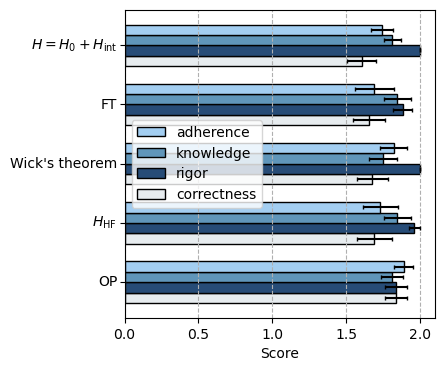

In [55]:
execution_groupby_task_type_mean=execution_groupby_task_type[execution_groupby_task_type[('in paper','count')]>2].loc[task_type_order[::-1]].loc[:,(slice(None),'mean')].iloc[:,:1:-1].droplevel(1,axis=1)
execution_groupby_task_type_sem=execution_groupby_task_type[execution_groupby_task_type[('in paper','count')]>2].loc[task_type_order[::-1]].loc[:,(slice(None),'sem')].iloc[:,:1:-1].droplevel(1,axis=1)
ax=execution_groupby_task_type_mean.plot(kind='barh',xerr=execution_groupby_task_type_sem,figsize=(4,4),color=['#e7ecef','#274c77','#6096ba','#a3cef1'],capsize=1.5,edgecolor='k',width=0.7,)
ax.grid(axis='x',ls='--')
ax.set_ylabel('')
ax.set_xlabel('Score')
# ax.set_yticklabels(['\n'.join(textwrap.wrap(task, width=20)) for task in execution_groupby_task_type_mean.index],fontsize=7)
ax.set_yticklabels([])
[ax.text(-0.05,idx,task,ha='right',va='center',) for (idx,task) in (enumerate(execution_groupby_task_type_mean.index))]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
# ax.set_title('Score of execution by different steps')

In [56]:
execution_groupby_task_type_mean_score.loc[task_type_order]

,mean,sem,count
task_type,,,
$H=H_0+H_{\rm{int}}$,1.790698,0.047011,43
FT,1.769231,0.070606,26
Wick's theorem,1.812500,0.059796,28
$H_{\rm{HF}}$,1.807692,0.072467,26
OP,1.844595,0.062294,37


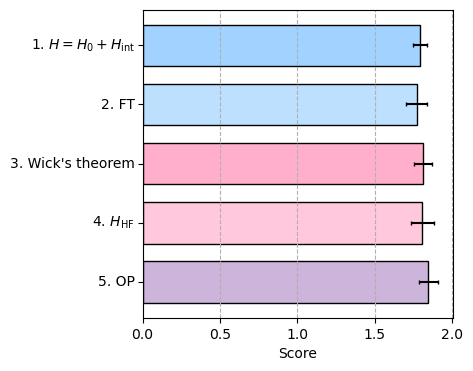

In [57]:
execution_groupby_task_type_mean_score_mean=execution_groupby_task_type_mean_score.loc[task_type_order[::-1]]['mean']
execution_groupby_task_type_mean_score_sem=execution_groupby_task_type_mean_score.loc[task_type_order[::-1]]['sem']
ax=execution_groupby_task_type_mean_score_mean.plot(kind='barh',xerr=execution_groupby_task_type_mean_score_sem,figsize=(4,4),capsize=1.5,edgecolor='k',width=0.7,color=step_color_list[::-1])

ax.set_yticklabels([])
[ax.text(-0.05,idx,str(5-idx)+'. '+task,ha='right',va='center',) for idx,task in enumerate(execution_groupby_task_type_mean_score_mean.index)]


ax.grid(axis='x',ls='--')
ax.set_ylabel('')
ax.set_xlabel('Score')

ax.get_figure().savefig('3d.pdf',bbox_inches='tight')

In [ ]:
execution_groupby_task_type_mean=execution_groupby_task_type[execution_groupby_task_type[('in paper','count')]>2].loc[task_type_order[::-1]].loc[:,(slice(None),'mean')].iloc[:,:1:-1].droplevel(1,axis=1)
execution_groupby_task_type_sem=execution_groupby_task_type[execution_groupby_task_type[('in paper','count')]>2].loc[task_type_order[::-1]].loc[:,(slice(None),'sem')].iloc[:,:1:-1].droplevel(1,axis=1)
ax=execution_groupby_task_type_mean.plot(kind='barh',xerr=execution_groupby_task_type_sem,figsize=(4,4),color=step_color_list[::-1],capsize=1.5,edgecolor='k',width=0.7,)
ax.grid(axis='x',ls='--')
ax.set_ylabel('')
ax.set_xlabel('Score')
# ax.set_yticklabels(['\n'.join(textwrap.wrap(task, width=20)) for task in execution_groupby_task_type_mean.index],fontsize=7)
ax.set_yticklabels([])
[ax.text(-0.05,idx,task,ha='right',va='center',) for (idx,task) in (enumerate(execution_groupby_task_type_mean.index))]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
# ax.set_title('Score of execution by different steps')

# Score by branch

In [40]:
branch_from_arxiv=dict(zip(reading_data.index.get_level_values(1),reading_data.index.get_level_values(0)))

In [41]:
execution.index=pd.MultiIndex.from_tuples([(branch_from_arxiv[index[0]],)+index for index in execution.index.tolist()],names=['branch','arxiv_number','task_type','task'])

In [42]:
execution_groupby_branch=execution.groupby('branch').agg(['mean','sem','count'])

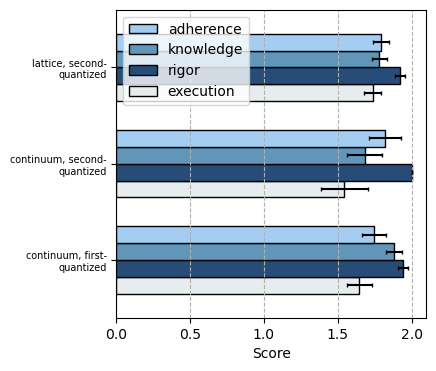

In [45]:
execution_groupby_branch_mean=execution_groupby_branch[execution_groupby_branch[('in paper','count')]>2].loc[:,(slice(None),'mean')].iloc[:,:1:-1].droplevel(1,axis=1)
exeution_groupby_branch_sem=execution_groupby_branch[execution_groupby_branch[('in paper','count')]>2].loc[:,(slice(None),'sem')].iloc[:,:1:-1].droplevel(1,axis=1)
ax=execution_groupby_branch_mean.plot(kind='barh',xerr=exeution_groupby_branch_sem,figsize=(4,4),color=['#e7ecef','#274c77','#6096ba','#a3cef1'],capsize=1.5,edgecolor='k',width=0.7,)
ax.grid(axis='x',ls='--')
ax.set_ylabel('')
ax.set_xlabel('Score')
ax.set_yticklabels(['\n'.join(textwrap.wrap(task, width=20)) for task in execution_groupby_branch_mean.index],fontsize=7)
# ax.set_title('Score of execution by branches')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Score conditioned on in paper

In [58]:
execution_groupby_in_paper=execution.groupby('in paper').agg(['mean','sem','count'])

In [ ]:
execution_groupby_in_paper[execution_groupby_in_paper[('correctness','count')]>2].loc[:,(slice(None),'mean')].iloc[::-1,:0:-1]

,correctness,rigor,knowledge,adherence
,mean,mean,mean,mean
in paper,,,,
2,1.654545,1.927273,1.80,1.781818
1,1.700000,1.925000,1.85,1.850000
0,1.723077,1.953846,1.80,1.738462


In [ ]:
execution_groupby_in_paper[execution_groupby_in_paper[('execution','count')]>2].loc[:,(slice(None),'mean')].iloc[::-1,:0:-1]

,execution,rigor,knowledge,adherence
,mean,mean,mean,mean
in paper,,,,
2,1.654545,1.927273,1.800000,1.781818
1,1.700000,1.925000,1.850000,1.850000
0,1.692308,1.953846,1.769231,1.738462


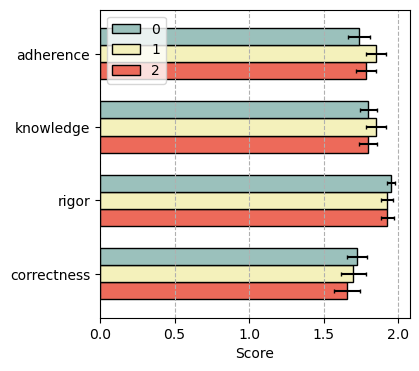

In [61]:
execution_groupby_in_place_mean=execution_groupby_in_paper[execution_groupby_in_paper[('correctness','count')]>2].loc[:,(slice(None),'mean')].iloc[::-1,:0:-1].droplevel(1,axis=1).T
execution_groupby_in_place_sem=execution_groupby_in_paper[execution_groupby_in_paper[('correctness','count')]>2].loc[:,(slice(None),'sem')].iloc[::-1,:0:-1].droplevel(1,axis=1).T
ax=execution_groupby_in_place_mean.plot(kind='barh',xerr=execution_groupby_in_place_sem,figsize=(4,4),color=['#ed6a5a','#f4f1bb','#9bc1bc'],capsize=1.5,edgecolor='k',width=0.7,)
ax.grid(axis='x',ls='--')
ax.set_ylabel('')
ax.set_xlabel('Score')
# ax.set_yticklabels(['\n'.join(textwrap.wrap(task.replace(' ',' '), width=20)) for task in execution_groupby_in_place_mean.index],fontsize=7)
ax.legend().set_title('Answer\nOverlap')
# ax.set_title('Overlap between asnwers and training papers')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

ax.get_figure().savefig('3c.pdf',bbox_inches='tight')

In [51]:
execution_groupby_branch_mean

,follow instructions,physics logic,math derivation,final answer accuracy
branch,,,,
"continuum, first-quantized",1.745098,1.882353,1.941176,1.647059
"continuum, second-quantized",1.818182,1.681818,2.000000,1.545455
"lattice, second-quantized",1.804598,1.781609,1.919540,1.701149


# Score conditioned on prompt_quality

In [80]:
execution_groupby_prompt_quality=execution.groupby('prompt quality').agg(['mean','sem','count'])

In [89]:
execution_groupby_prompt_quality[execution_groupby_prompt_quality[('execution','count')]>=2]

in paper                 adherence                 knowledge  \
                    mean       sem count      mean       sem count      mean   
prompt quality                                                                 
0               2.000000  0.000000     3  1.000000  0.577350     3  1.000000   
1               1.352941  0.170233    17  1.764706  0.136377    17  1.588235   
2               0.864286  0.073253   140  1.800000  0.042044   140  1.842857   

                                   rigor                 execution            \
                     sem count      mean       sem count      mean       sem   
prompt quality                                                                 
0               0.577350     3  1.333333  0.666667     3  0.666667  0.666667   
1               0.123038    17  2.000000  0.000000    17  1.235294  0.182495   
2               0.036932   140  1.942857  0.019688   140  1.757143  0.042857   

                      
               count  
prompt quality        
0                  3  
1                 17  
2                140

prompt quality
0    0.01875
1    0.10625
2    0.87500
Name: (in paper, count), dtype: float64

(0.0, 1.0)

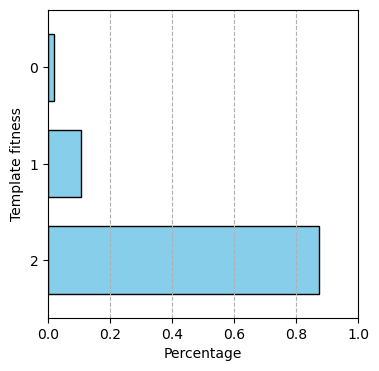

In [107]:
execution_groupby_prompt_quality_percentage=execution_groupby_prompt_quality.loc[:,(slice(None),'count')].iloc[:,0]/execution_groupby_prompt_quality.loc[:,(slice(None),'count')].iloc[:,0].sum()
ax=execution_groupby_prompt_quality_percentage.iloc[::-1].plot(kind='barh',figsize=(4,4),color='skyblue',edgecolor='k',width=0.7,)
ax.set_xlabel('Percentage')
ax.set_ylabel('Template fitness')
ax.grid(axis='x',ls='--')
ax.set_xlim(0,1)

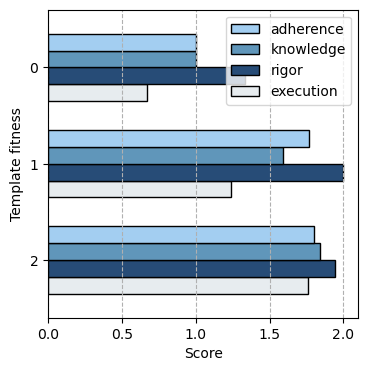

In [125]:
execution_groupby_prompt_quality_mean=execution_groupby_prompt_quality[execution_groupby_prompt_quality[('execution','count')]>=2].loc[::-1,(slice(None),'mean')].iloc[:,:0:-1].droplevel(1,axis=1)
execution_groupby_prompt_quality_sem=execution_groupby_prompt_quality[execution_groupby_prompt_quality[('execution','count')]>=2].loc[::-1,(slice(None),'sem')].iloc[:,:0:-1].droplevel(1,axis=1)
ax=execution_groupby_prompt_quality_mean.plot(kind='barh',figsize=(4,4),color=['#e7ecef','#274c77','#6096ba','#a3cef1'],capsize=1.5,edgecolor='k',width=0.7,)
# ['cyan','#9bc1bc','#faf0ca','#f4d35e',]
ax.grid(axis='x',ls='--')
ax.set_ylabel('Template fitness')
ax.set_xlabel('Score')
# ax.set_yticklabels(['\n'.join(textwrap.wrap(task.replace(' ',' '), width=20)) for task in execution_groupby_prompt_quality_mean.index],fontsize=7)
# ax.set_yticks(np.arange(4))
# ax.legend().set_title('Template\nFitness')
# ax.set_title('Deviation from standard structure of template')

# for index,value in enumerate(execution_groupby_prompt_quality[('in paper','count')]):
# # for yval,(xval,val) in enumerate(zip(execution_groupby_prompt_quality[('in paper','count')],))
#     for idx in range(4):
#         ax.text(0.2, idx+(index-1)*0.7/3, str(value), color='black', va='center')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

In [55]:
execution_groupby_branch_mean

,follow instructions,physics logic,math derivation,final answer accuracy
branch,,,,
"continuum, first-quantized",1.745098,1.882353,1.941176,1.647059
"continuum, second-quantized",1.818182,1.681818,2.000000,1.545455
"lattice, second-quantized",1.804598,1.781609,1.919540,1.701149


In [56]:
execution_groupby_task_mean

,follow instructions,physics logic,math derivation,final answer accuracy
task,,,,
"Construct Kinetic Hamiltonian (continuum version, single-particle)",1.600000,1.600000,2.000000,0.600000
"Convert from single-particle to second-quantized form, return in summation (expand the matrix)",1.000000,1.500000,1.750000,1.000000
Define each term in Kinetic Hamiltonian (continuum version),1.571429,1.714286,2.000000,1.428571
Expand interaction,1.636364,1.636364,2.000000,1.454545
Swap the index only,1.571429,1.714286,2.000000,1.571429
Wick's theorem,1.928571,1.642857,2.000000,1.571429
Construct Kinetic Hamiltonian (lattice version),1.571429,2.000000,2.000000,1.571429
Convert interacting Hamiltonian in real space to momentum space (lattice version),2.000000,1.714286,1.857143,1.714286
"Convert from single-particle to second-quantized form, return in matrix",1.500000,2.000000,2.000000,1.750000


# Obsolete

Text(0.5, 0, 'Score')

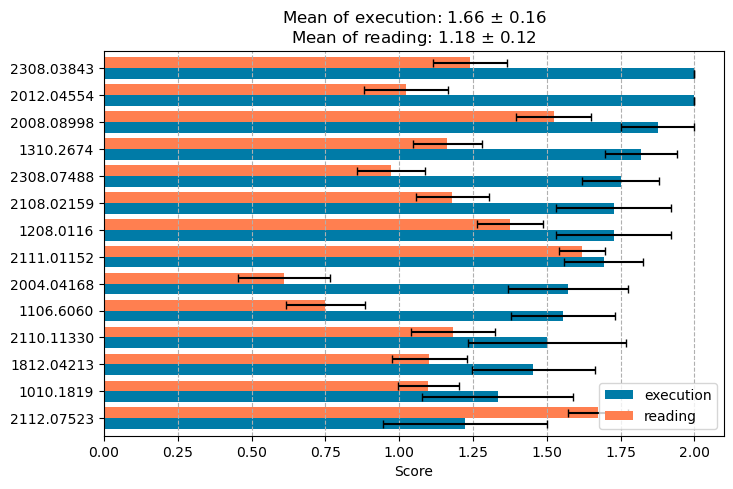

In [ ]:
execution_reading_mean=pd.concat([arxiv_dict_mean,reading_data_mean],axis=1,).rename(columns={'final answer accuracy':'execution','Value':'Extraction'}).sort_values('execution')
execution_reading_se=pd.concat([arxiv_dict_se,reading_data_se],axis=1,).rename(columns={'final answer accuracy':'execution','Value':'Extraction'}).sort_values('execution')

execution_reading_mean.plot(kind='barh',color=['#007BA7', '#FF7F50'],figsize=(8,5),width=0.8,xerr=execution_reading_se,capsize=3)
plt.title('\n'.join([f'Mean of {kind}: {mean:.2f} $\pm$ {se:.2f}' for kind,mean,se in zip(['Execution','Extraction'],execution_reading_mean.mean(),execution_reading_se.mean())]))
plt.grid(axis='x',ls='--')
plt.xlabel('Score')

In [ ]:
color_list=[plt.cm.Blues(0.2+0.8*(i/6)) for i in range(6,0,-1)]

Text(0.5, 0, 'Score')

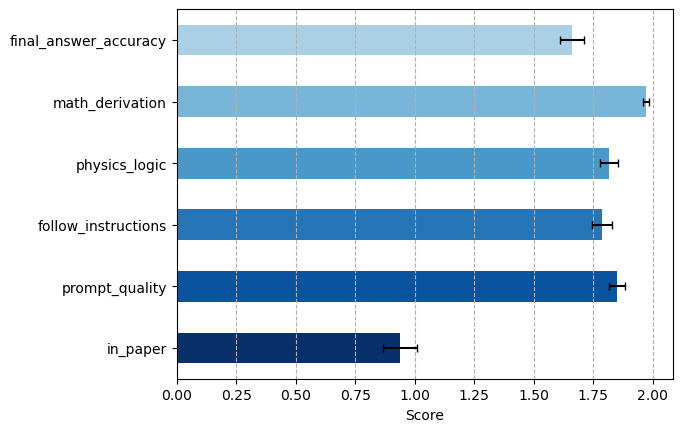

In [ ]:
arxiv_dict.mean().plot(kind='barh',color=[plt.cm.Blues(0.2+0.8*(i/6)) for i in range(6,0,-1)],xerr=arxiv_dict.sem(),capsize=3,)
plt.grid(axis='x',ls='--')
plt.xlabel('Score')

In [ ]:
import pandas as pd

In [ ]:
def load_score(arxiv_number):
    prompt_template='../prompt_template.md'
    # arxiv_number='1106.6060'
    prompt_dict=load_prompt_template(prompt_template)
    with open(os.path.join('..',f'{arxiv_number}',f'{arxiv_number}.yaml'),'r') as f:
        kwargs= yaml.safe_load(f)
    tasks=[f'Task:{idx} '+kwarg['task'] for idx,kwarg in enumerate(kwargs[1:])]
    aspect_score={}
    for kwarg in kwargs[1:]:
        for key,value in (list(kwarg['score'].items())):
            if key not in aspect_score:
                aspect_score[key]=[value]
            else:
                aspect_score[key].append(value)
    return pd.DataFrame(aspect_score,index=tasks)

In [ ]:
df_list=[load_score(arxiv_number) for arxiv_number in arxiv_number_list]

In [ ]:
dfs=pd.concat(df_list,keys=arxiv_number_list,names=['arxiv_number','task'])

In [ ]:
dfs

NameError: name 'dfs' is not defined

Text(0.5, 0, 'Score')

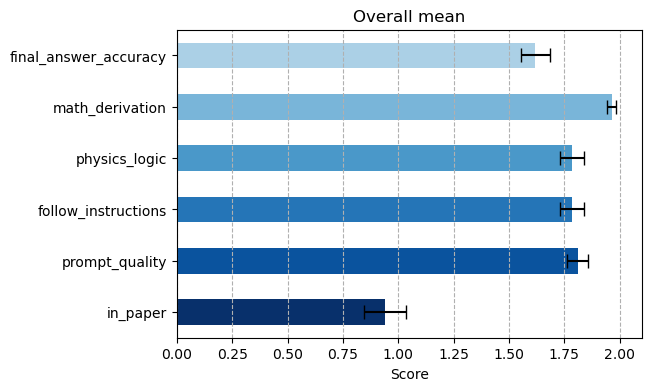

In [ ]:
error_bar=dfs.std().values/dfs.shape[0]**0.5
dfs.mean().plot(kind='barh',figsize=(6,4),xlim=(0,2.1),title='Overall mean',color=color_list,xerr=error_bar,capsize=5)
plt.grid(axis='x',ls='--')
plt.xlabel('Score')

In [ ]:
df.T

,Original Score,Conditional Score
Quality,8,7
Efficiency,6,5
Reliability,7,8
Innovation,9,8


In [ ]:
group='in_paper'
# group='prompt_quality'
mean=arxiv_dict.groupby(group)[['follow_instructions','physics_logic','math_derivation','final answer accuracy']].mean()
error_bar=arxiv_dict.groupby(group)[['follow_instructions','physics_logic','math_derivation','final answer accuracy']].std()/arxiv_dict.groupby(group)[['follow_instructions','physics_logic','math_derivation','final answer accuracy']].count()**0.5


In [ ]:
mean

,follow_instructions,physics_logic,math_derivation,final_answer_accuracy
in_paper,,,,
0,1.727273,1.781818,2.000000,1.672727
1,1.850000,1.850000,1.925000,1.725000
2,1.804348,1.826087,1.978261,1.586957


In [ ]:
list(mean.iterrows())

[(0,
  follow_instructions      1.727273
  physics_logic            1.781818
  math_derivation          2.000000
  final_answer_accuracy    1.672727
  Name: 0, dtype: float64),
 (1,
  follow_instructions      1.850
  physics_logic            1.850
  math_derivation          1.925
  final_answer_accuracy    1.725
  Name: 1, dtype: float64),
 (2,
  follow_instructions      1.804348
  physics_logic            1.826087
  math_derivation          1.978261
  final_answer_accuracy    1.586957
  Name: 2, dtype: float64)]

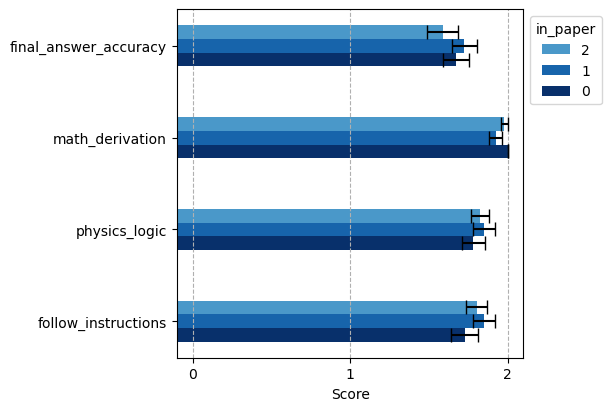

In [ ]:
x = np.arange(mean.shape[1])  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(6,4))
color_list=[plt.cm.Blues(0.2+0.8*(i/4)) for i in range(4,0,-1)]
# for attribute, measurement in aspect_score.items():
for attribute, measurement in mean.iterrows():
    offset = width * multiplier
    if not error_bar.loc[attribute].isna().any():
        rects = ax.barh(x + offset, np.array(measurement)+0.1, width, label=attribute,color=color_list[multiplier],left=-0.1,xerr=error_bar.loc[attribute].values,capsize=5)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xlabel('Score')
ax.set_xticks([0,1,2])
# ax.set_title(f"{arxiv_number}")
ax.set_yticks(x + width*1, ['\n'.join(textwrap.wrap(label, width=40)) for label in mean.columns])

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='upper left', ncols=1,bbox_to_anchor=(1, 1),title=group)

ax.grid(axis='x',ls='--')
# ax.set_ylim(0, 250)
ax.set_xlim(-0.1,2.1)

plt.show()